$$
    \Huge{
        \text{Advection Equation for 1D case}\\
        Q_t+aQ_x=0
        \\
        \\
        \boxed{1. \text{ Finite Difference Method}}
        \\
        Q^{n+1}_j=Q_{j}^n-\frac{a\Delta t}{2\Delta x}(Q_{i+1}^n-Q_{i-1}^n)
        \\
        \boxed{2. \text{ Upwind scheme}}
        \\
        Q_i^{n+1}=Q_i^n-\frac{a\Delta t}{\Delta x}(Q_{i}^n-Q_{i-1}^n)
        \\
        \\
        \\
        \boxed{3. \text{ Lax-Wendroff scheme}}
        \\
        Q_i^{n+1}=Q_i^n-\frac{a\Delta t}{2\Delta x}(Q_{i+1}^n-Q_{i-1}^n)+\frac{1}{2}(\frac{a\Delta t}{\Delta x})^2(Q_{i+1}^n-2Q_i^n+Q_{i-1}^n)
        \\
        \\
        \boxed{4. \text{ Initial condition}}
        \\
        Q(0, x) = e^{-\frac{1}{\sigma ^2}(x-x_0)^2}
     }
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_Shape(Q, dx, sx, dt, ti, method):
    nt = len(Q[:, 0])
    nx = len(Q[0, :])
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    ti = ti - 1
    tt = nt // ti
    plt.figure(figsize=(25, 15))
    for i in range(ti+1):
        d = Q[i*tt]
        if i >= ti:
            plt.plot(x, d, ls='-', lw=6, label='%.3f s' %(i*dt*tt))
        else:
            plt.plot(x, d, ls='--', lw=6, label='%.3f s' %(i*dt*tt))
    plt.plot([sx*dx, sx*dx], [0, 1], ls=':', lw=3, color='k')
    ax = plt.gca()
    # Grid lines on Y axis.
    ax.yaxis.grid(ls=':', lw=4, color='#999999')
    ax.set_yticks(np.linspace(0, 1, 6))
    # Grid lines on X axis.
    ax.xaxis.grid(ls=':', lw=4, color='#999999')
    ax.set_xticks(np.arange(11)*((nx-1)/10)*dx)
    plt.legend(fontsize=30)
    plt.xlabel('X [m]', fontsize=35)
    plt.ylabel('Amp.', fontsize=35)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    plt.xlim(x[0], x[-1])
    plt.ylim(-0.1, 1.2)
    plt.title(method, fontsize=35)
    plt.savefig(method+'.tiff')
    plt.show()


def FVM_1D_Upwind(nt, dt, c, nx, dx, sx, sigma):
    Q = np.zeros((nt, nx))
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    s = np.exp(-1/sigma**2*(x-sx*dx)**2) #* np.sin(2*np.pi*x/32)
    Q[0] = s
    for i in range(nt-1):
        for j in range(1, nx):
            dQ = (Q[i, j]-Q[i, j-1]) / dx
            Q[i+1, j] = Q[i, j] - c*dt*dQ
        Q[i, 0] = Q[i, nx-2]
    plot_Shape(Q, dx, sx, dt, 5, 'Upwind')

def FVM_1D_LW(nt, dt, c, nx, dx, sx, sigma):
    Q = np.zeros((nt, nx))
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    s = np.exp(-1/sigma**2*(x-sx*dx)**2) #* np.sin(2*np.pi*x/32)
    Q[0] = s
    for i in range(nt-1):
        for j in range(1, nx-1):
            dQ1 = (Q[i, j+1]-Q[i, j-1]) / (2*dx)
            dQ2 = (Q[i, j+1]-2*Q[i, j]+Q[i, j-1]) / dx**2
            Q[i+1, j] = Q[i, j] - c*dt*dQ1 + 0.5*(c*dt)**2*dQ2
        Q[i, 0] = Q[i, nx-2]
    plot_Shape(Q, dx, sx, dt, 5, 'Lax-Wendroff')

def FDM_1D(nt, dt, c, nx, dx, sx):
    x = np.arange(nx) * dx
    t = np.arange(nt) * dt
    s = np.exp(-1/sigma**2*(x-sx*dx)**2) #* np.sin(2*np.pi*x/32)
    Q = np.zeros((nt, nx))
    Q[0] = s
    for i in range(0, nt-1):
        for j in range(1, nx-1):
            Q[i+1, j] = Q[i, j] - c*dt/dx/2 * (Q[i,j+1]-Q[i, j-1])
#             Q[i+1, j] = Q[i, j] - c*dt/dx/2 * (Q[i,j+1]-Q[i, j-1])
#             Q[i+1, j] = Q[i, j] - c*dt/dx * (Q[i,j+1]-Q[i, j])
    plot_Shape(Q, dx, sx, dt, 5, 'FDM')

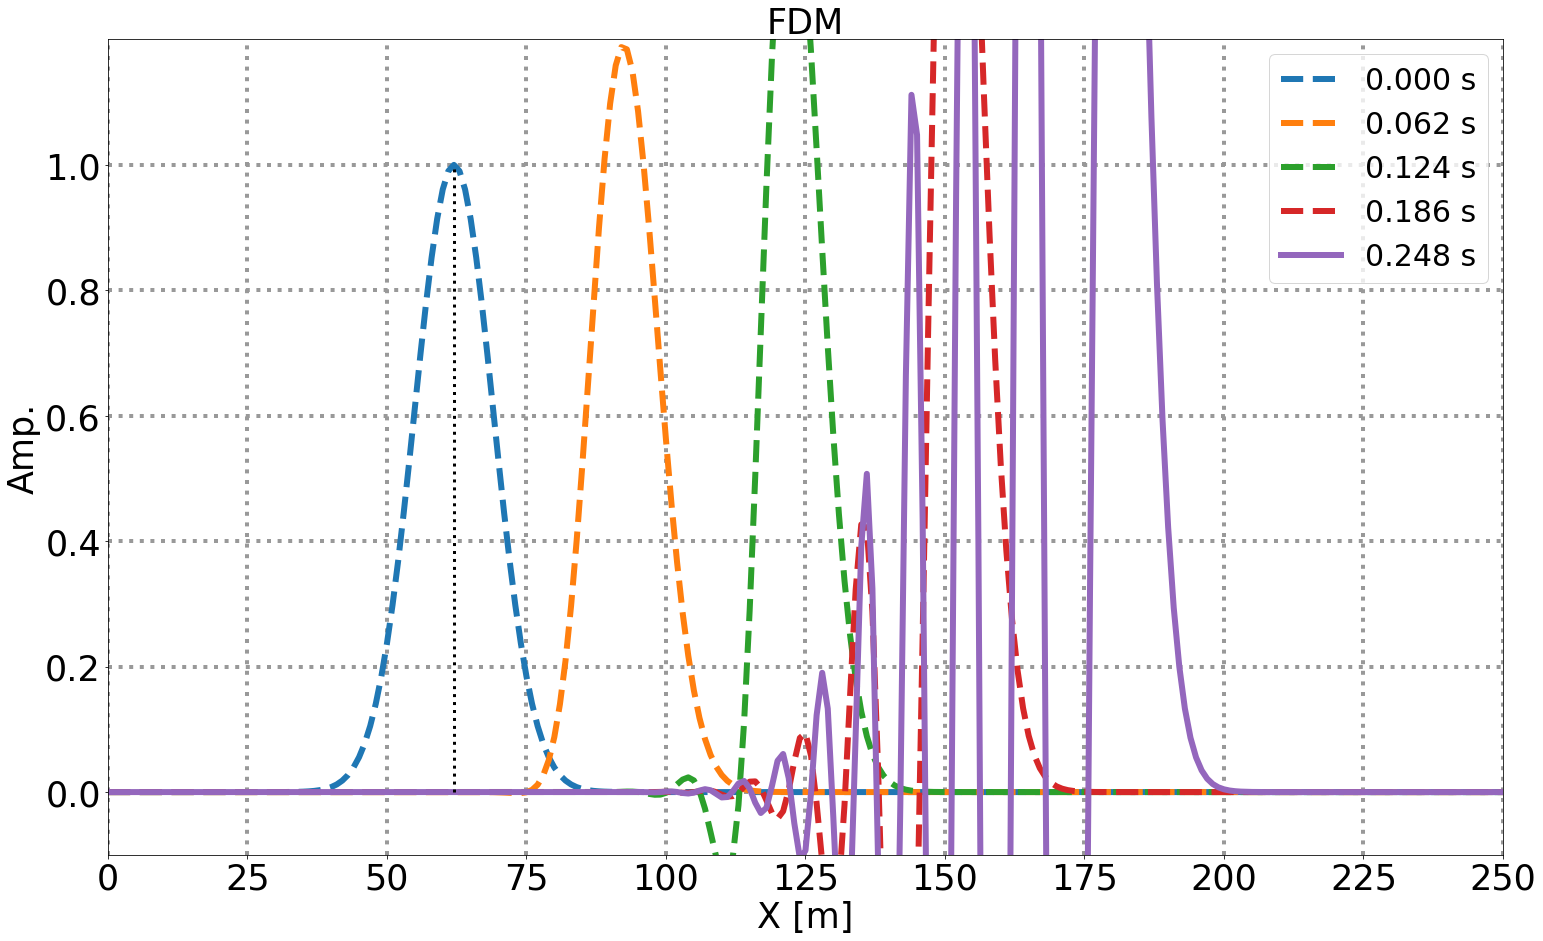

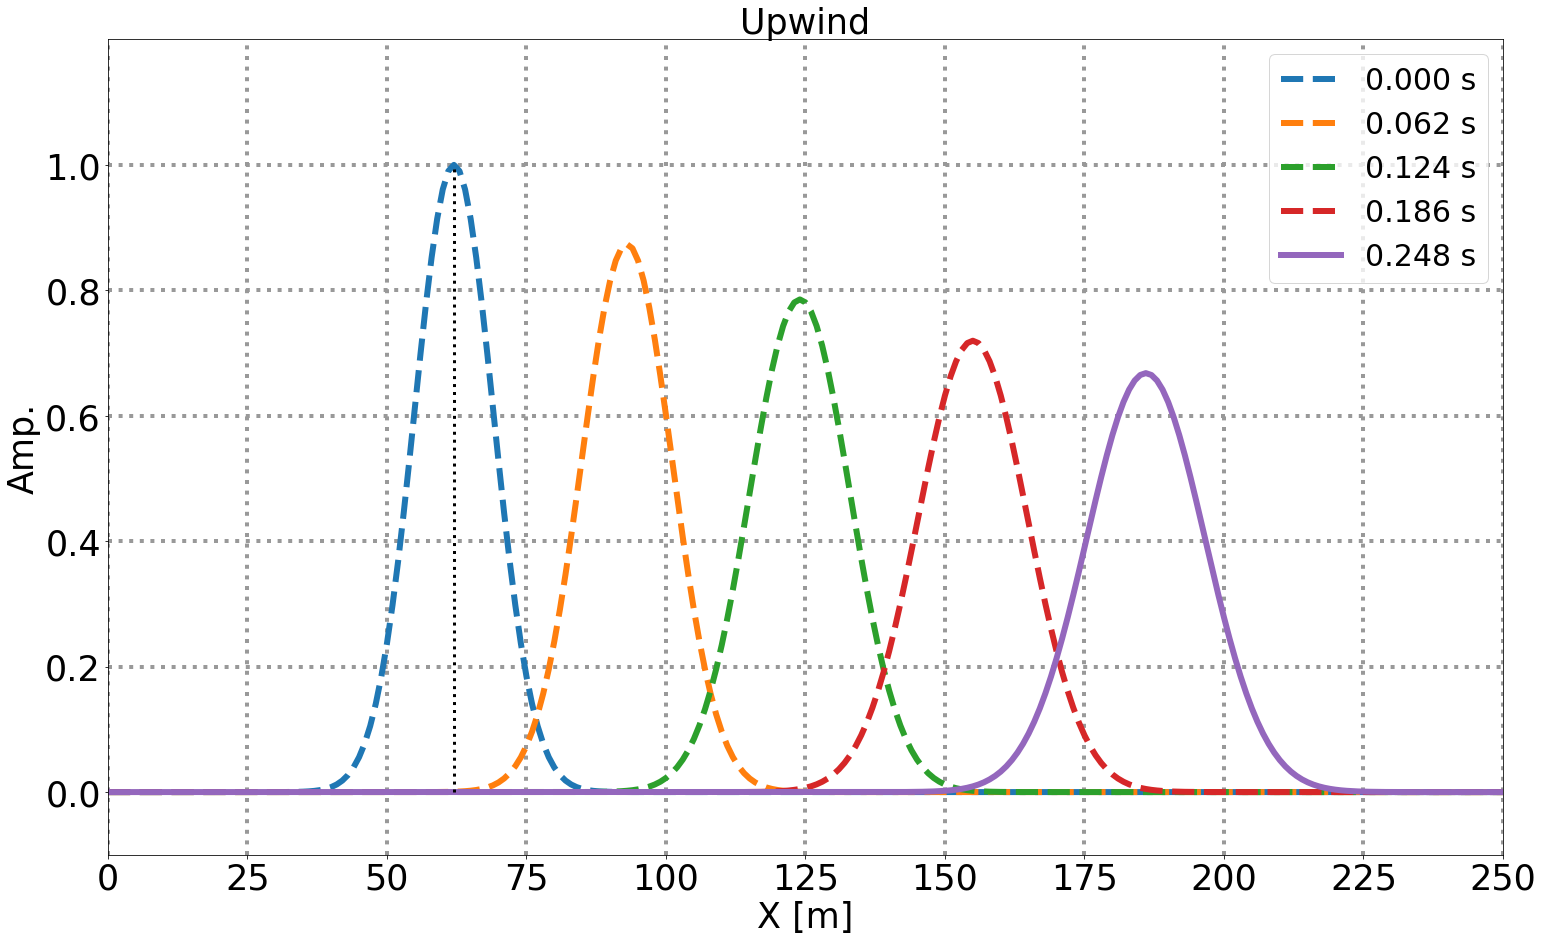

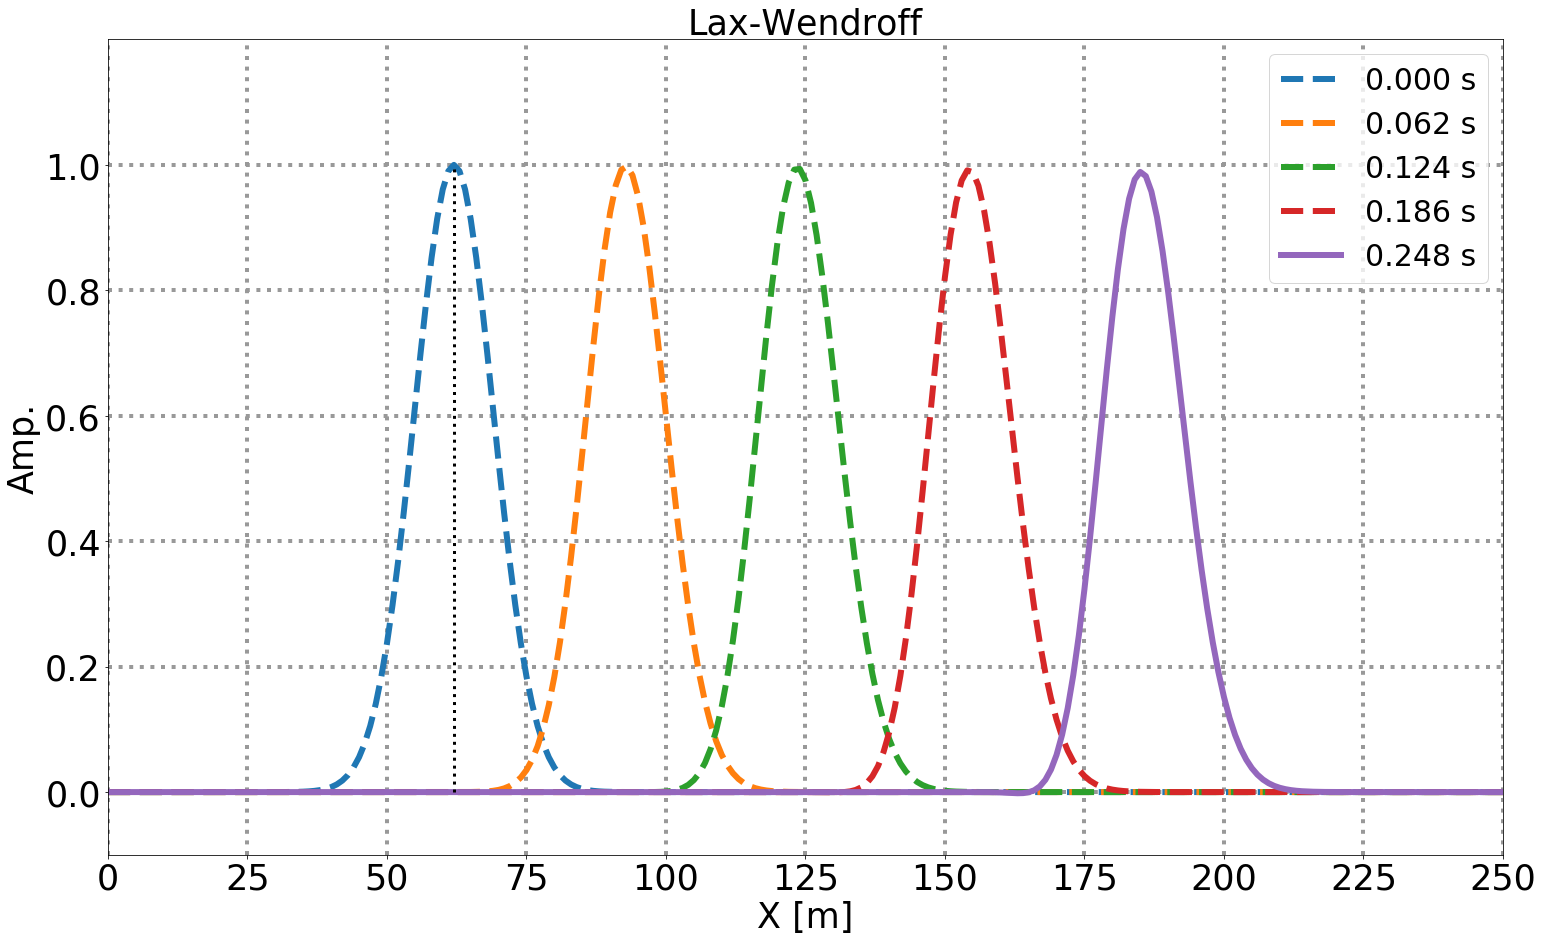

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


nt = 251
dt = 1e-3
c = 5e2
nx = 251
dx = 1
sx = nx // 4
sigma = 10

FDM_1D(nt, dt, c, nx, dx, sx)
FVM_1D_Upwind(nt, dt, c, nx, dx, sx, sigma)
FVM_1D_LW(nt, dt, c, nx, dx, sx, sigma)

***
***
***
$$
    \Huge{
       \boxed{ \text{Advection Equation for 2D Case} }
        \\
        Q_t+a_xQ_x+a_yQ_y=0
        \\
        \\
        \boxed{1. \text{ Finite Difference Method}}
        \\
        Q^{n+1}_j=Q_{j}^n-\frac{a_x\Delta t}{2\Delta x}(Q_{j,k+1}^n-Q_{j,k-1}^n)-\frac{a_y\Delta t}{2\Delta y}(Q_{j+1,k}^n-Q_{j-1,k}^n)
        \\
        \boxed{2. \text{ Upwind scheme}}
        \\
        Q_i^{n+1}=Q_i^n-\frac{a_x\Delta t}{\Delta x}(Q_{j,k}^n-Q_{j,k-1}^n)-\frac{a_y\Delta t}{\Delta y}(Q_{j,k}^n-Q_{j-1,k}^n)
        \\
        \\
        \\
        \boxed{3. \text{ Lax-Wendroff scheme}}
        \\
        \begin{aligned}
            Q_i^{n+1}&=Q_i^n-\frac{a_x\Delta t}{2\Delta x}(Q_{j,k+1}^n-Q_{j,k-1}^n)-\frac{a_y\Delta t}{2\Delta y}(Q_{j+1,k}^n-Q_{j-1,k}^n)\\
            &+\frac{1}{2}(\frac{a_x\Delta t}{\Delta x})^2(Q_{j,k+1}^n-2Q_{j,k}^n+Q_{j,k-1}^n)+\frac{1}{2}(\frac{a_y\Delta t}{\Delta y})^2(Q_{j+1,k}^n-2Q_{j,k}^n+Q_{j-1,k}^n)
        \end{aligned}
        \\
        \\
        \boxed{4. \text{ Initial condition}}
        \\
        \text{4.1 Gaussian shape}
        \\
        Q(0,x,y) = e^{-[\frac{1}{\sigma_x ^2}(x-x_0)^2+\frac{1}{\sigma_y^2}(y-y_0)^2]}
        \\
        \text{4.2 Gaussian-shaped Sine}
        \\
        Q(0,x,y) = sin(\frac{1}{\sigma_x ^2}(x-x_0)^2+\frac{1}{\sigma_y^2}(y-y_0)^2])e^{-[\frac{1}{\sigma_x ^2}(x-x_0)^2+\frac{1}{\sigma_y^2}(y-y_0)^2]}
     }
$$

In [3]:
import numpy as np

def advection_2D(nt, dt, nx, dx, ny, dy, sx, sy, sigma, vx, vy):
    t = np.arange(nt) * dt
    x = np.arange(nx) * dx
    y = np.arange(ny) * dy
    
    Q = np.zeros((nt, ny, nx))
    X, Y = np.meshgrid(x-sx*dx, y-sy*dy)
    s = np.exp(-(2*X**2+Y**2)/sigma**2)
    Q[0] = s
    plt.pcolormesh(x, y, Q[0])
    plt.show()
    for i in range(nt-1):
        for j in range(1, ny-1):
            for k in range(1, nx-1):
                dQy1 = (Q[i, j+1, k]-Q[i, j-1, k]) / dy / 2
                dQx1 = (Q[i, j, k+1]-Q[i, j, k-1]) / dx / 2
                dQy2 = (Q[i, j+1, k]-2*Q[i, j, k]+Q[i, j-1, k]) / dy**2
                dQx2 = (Q[i, j, k+1]-2*Q[i, j, k]+Q[i, j, k-1]) / dx**2
                Q[i+1, j, k] = Q[i, j, k] - vy*dt*dQy1  - vx*dt*dQx1 + 0.5*(vy*dt)**2*dQy2 + 0.5*(vx*dt)**2*dQx2
    return t, x, y, Q

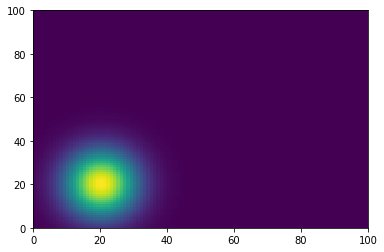

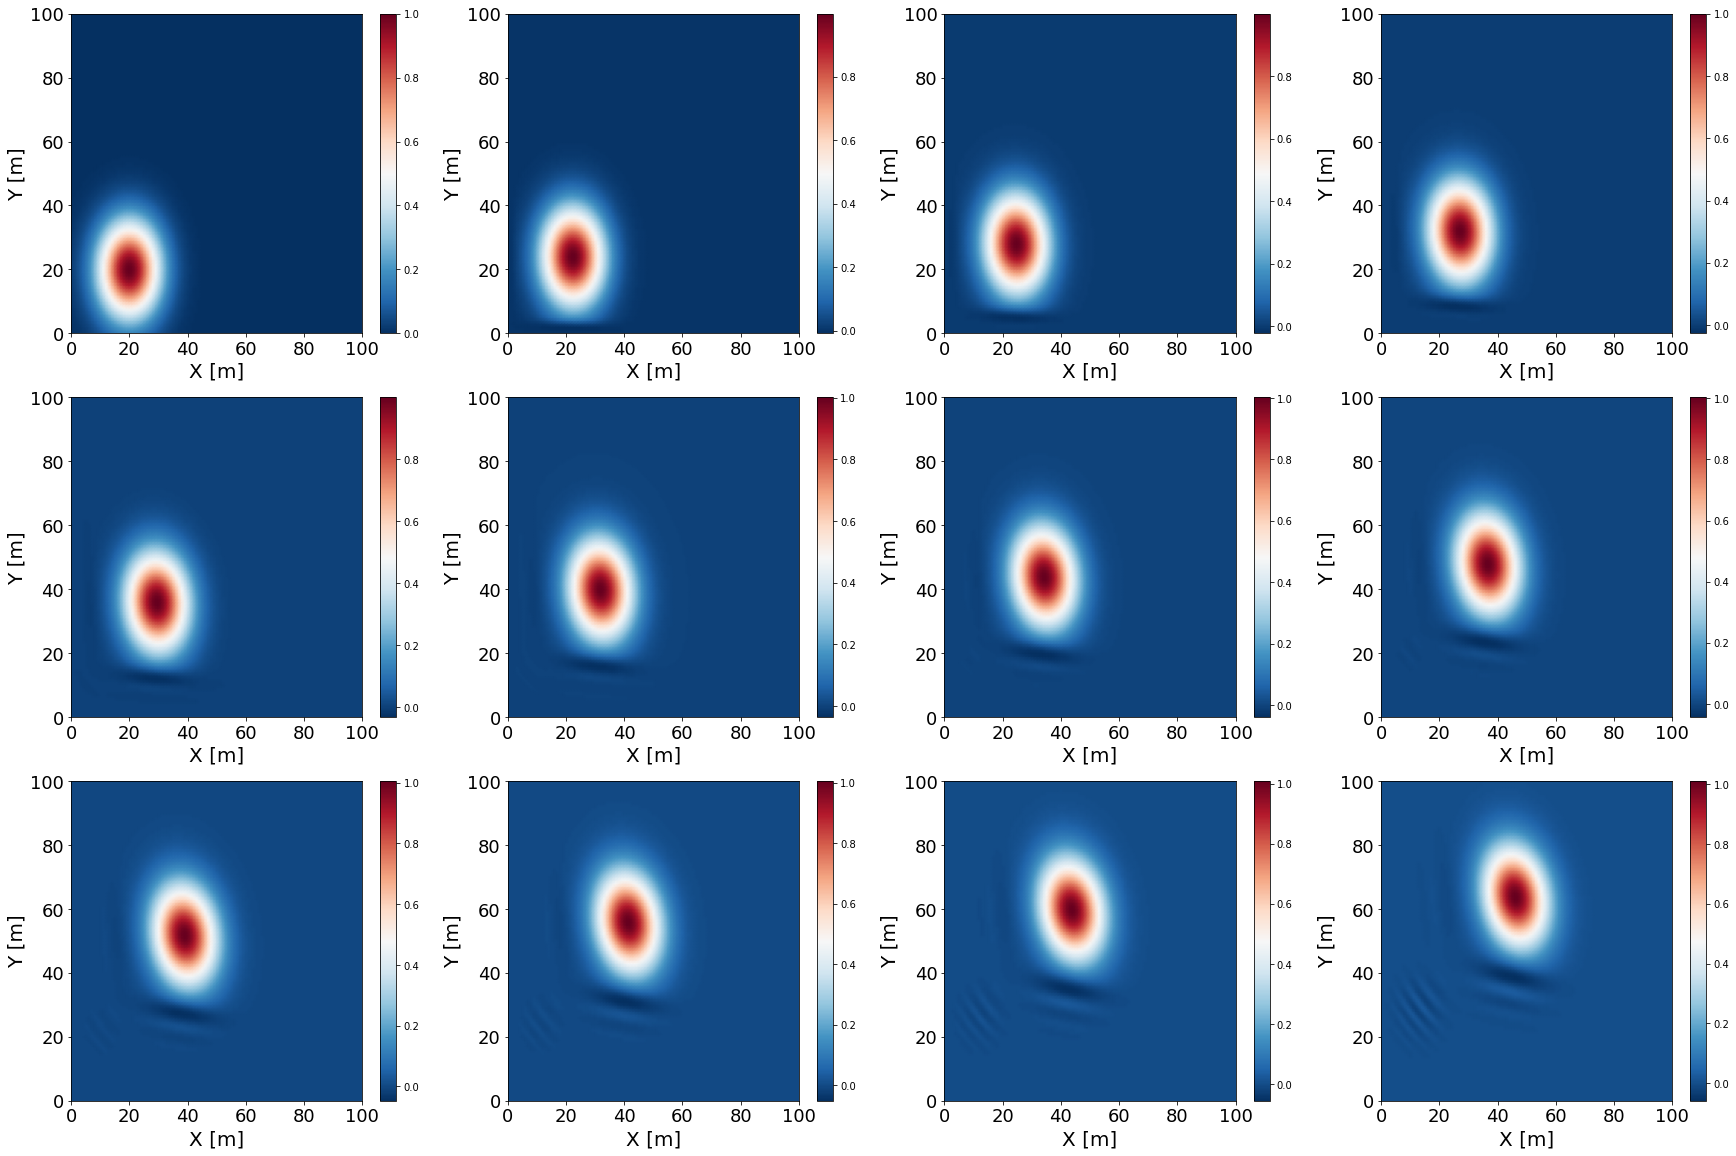

In [157]:
import matplotlib.pyplot as plt

nt = 101
dt = 1e-3
vx = 3e2
vy = 5e2
nx = 101
dx = 1
ny = 101
dy = 1
sigma = 15
sx = nx // 5
sy = ny // 5
t, x, y, Q = advection_2D(nt, dt, nx, dx, ny, dy, sx, sy, sigma, vx, vy)

plt.figure(figsize=(30, 20))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.pcolormesh(x, y, Q[i*8], cmap='RdBu_r', shading='gouraud')
    plt.colorbar()
    plt.xlabel('X [m]', fontsize=20)
    plt.ylabel('Y [m]', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
# plt.xlim(x[0], x[-1])
# plt.title(method, fontsize=35)
# plt.savefig(method+'.tiff')
plt.show()


In [53]:
import numpy as np

def elastic1D(nt, dt, nx, dx, sx, c, ro, sigma):
    mu = c**2 * ro
    A = np.array([[0, -mu], [-1/ro, 0]])
    c = np.sqrt(mu/ro)
    Q = np.zeros((nt, 2, nx))
    t = np.arange(nt) * dt
    x = np.arange(nx) * dx
    s = np.exp(-1/sigma**2*(x-sx*dx)**2)
    plt.plot(s)
    plt.show()
    Q[0, 0, :] = s
    for i in range(nt-1):
        Q[i, :, 1] = Q[i, :, 0]
        Q[i, :, nx-2] = Q[i, :, nx-1]
        for j in range(1, nx-1):
            Q1 = Q[i, :, j+1] - Q[i, :, j-1]
            Q2 = Q[i, :, j+1] - 2*Q[i, :, j] + Q[i, :, j-1]
            Q[i+1, :, j] = Q[i, :, j] - dt/(2*dx) * A @ Q1 + 0.5*(dt/dx)**2 * (A @ A) @ Q2
        
    return t, x, Q

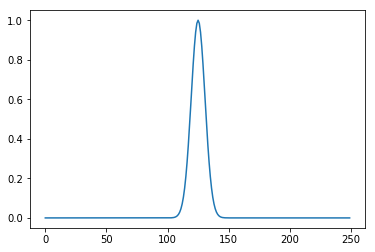

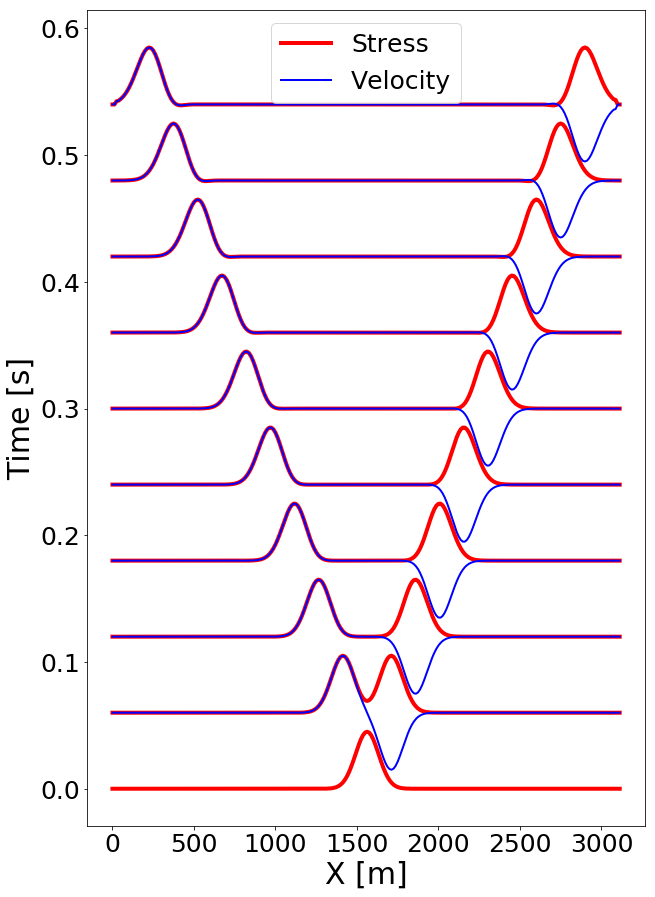

In [57]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

nt = 241
dt = 2.5e-3
nx = 250
dx = 12.5
c = 2500
ro = 2500
sx = nx/2
sigma = 100
t, x, Q = elastic1D(nt, dt, nx, dx, sx, c, ro, sigma)

ti = 10
tt = nt // ti
plt.figure(figsize=(10, 15))
for i in range(ti):
    d1 = Q[i*tt, 0, :]
    d2 = Q[i*tt, 1, :]
    d1 = d1 / max(abs(d1)) * dt * tt * 0.75
    d2 = d2 / max(abs(d2)) * dt * tt * 0.75
    if i < 1:
        plt.plot(x, d1+i*tt*dt, lw=4, color='r', label='Stress')
        plt.plot(x, d2+i*tt*dt, lw=2, color='b', label='Velocity')
    else:
        plt.plot(x, d1+i*tt*dt, lw=4, color='r')
        plt.plot(x, d2+i*tt*dt, lw=2, color='b')
plt.xlabel('X [m]', fontsize=30)
plt.ylabel('Time [s]', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.show()

In [51]:
print(c*dt/dx)

5.0


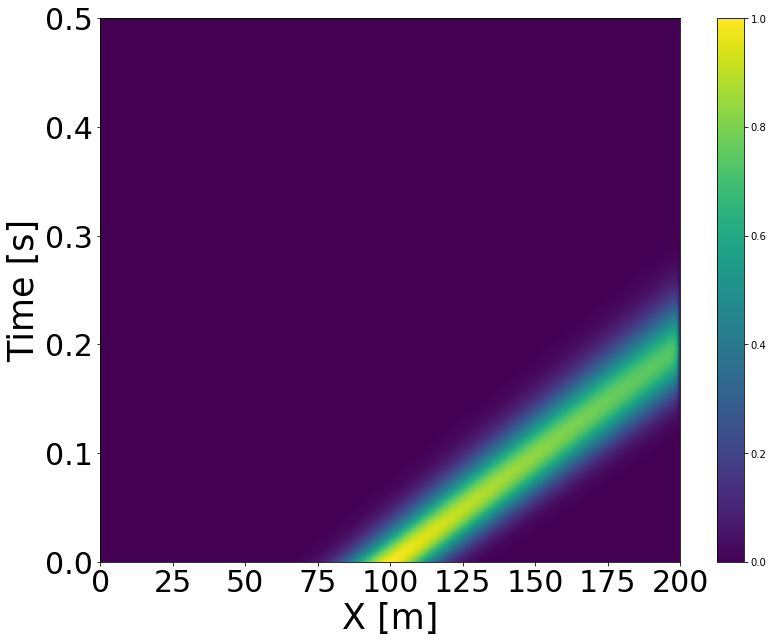

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def get_1D_Data(fname):
    with open(fname, 'r') as fin:
        p = []
        for line in fin.readlines():
            line.strip()
            p.append([float(pp) for pp in line.split()])
    p = np.array(p)
    return p

fname = 'Homework05_11930721_冯旭平_地空系/data/out.txt'
dt = 1e-3
dx = 1e0
p = get_1D_Data(fname)
x = np.arange(len(p[0])) * dx
t = np.arange(len(p[:, 0])) * dt
plt.figure(figsize=(13, 10))
plt.pcolormesh(x, t, p, shading='gouraud')
plt.xlabel('X [m]', fontsize=35)
plt.ylabel('Time [s]', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.colorbar()
plt.show()

In [9]:
import numpy as np

def get_ad2D(fname):
    p = []
    with open(fname, 'r') as fin:
        for line in fin.readlines():
            line = line.strip()
            p.append([float(pp) for pp in line.split()])
    return np.array(p)

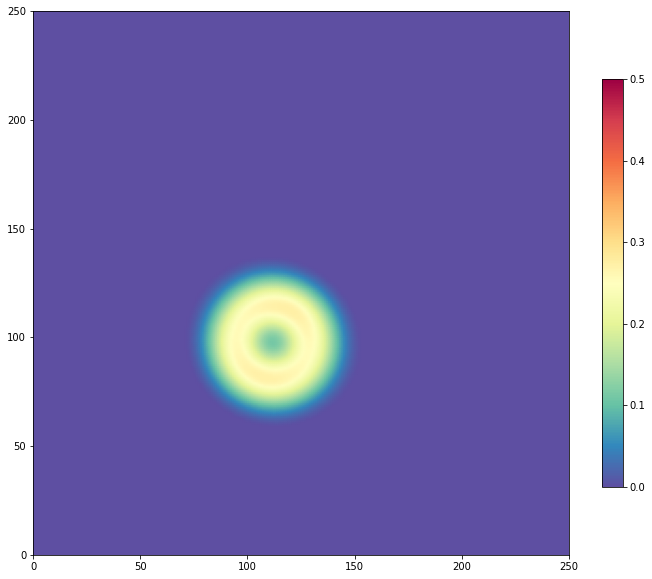

In [48]:
import matplotlib.pyplot as plt

fname = r'Homework05_11930721_冯旭平_地空系/data/Advection2D_Snapshots/advection2D_0.280000_out.txt'
p = get_ad2D(fname)
plt.figure(figsize=(12, 10))
plt.pcolormesh(p, cmap='Spectral_r', vmin=0, vmax=0.5, shading='gouraud')
plt.colorbar(shrink=0.75)
plt.show()